In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# !pip install pipelinehelper
from pipelinehelper import PipelineHelper

In [3]:
data = pd.read_csv("../outputs/summary_data.csv")
data = data.loc[
    ~data.isnull().any(axis=1),
]

labels = [
    "gs_score",
    "justice_gs_score_mean",
    "justice_gs_score_std",
    "justice_year_gs_score_mean",
    "justice_year_gs_score_std",
]
features = [
    "word_count",
    "duration",
    "pitch_log_diff_variance",
    "pitch_log_mean",
    "pitch_log_stdev",
    "pitch_log_2pct",
    "pitch_log_25pct",
    "pitch_log_50pct",
    "pitch_log_75pct",
    "pitch_log_98pct",
    "onset_count",
    "onset_str_mean",
    "onset_str_stddev",
    "onset_str_entropy",
    "onset_time_diff_mean",
    "onset_time_diff_stddev",
    "onset_time_diff_entropy",
    "word_rate",
    "onset_rate",
    "justice_word_count_mean",
    "justice_word_count_std",
    "justice_duration_mean",
    "justice_duration_std",
    "justice_pitch_log_diff_variance_mean",
    "justice_pitch_log_diff_variance_std",
    "justice_pitch_log_mean_mean",
    "justice_pitch_log_mean_std",
    "justice_pitch_log_stdev_mean",
    "justice_pitch_log_stdev_std",
    "justice_pitch_log_2pct_mean",
    "justice_pitch_log_2pct_std",
    "justice_pitch_log_25pct_mean",
    "justice_pitch_log_25pct_std",
    "justice_pitch_log_50pct_mean",
    "justice_pitch_log_50pct_std",
    "justice_pitch_log_75pct_mean",
    "justice_pitch_log_75pct_std",
    "justice_pitch_log_98pct_mean",
    "justice_pitch_log_98pct_std",
    "justice_onset_count_mean",
    "justice_onset_count_std",
    "justice_onset_str_mean_mean",
    "justice_onset_str_mean_std",
    "justice_onset_str_stddev_mean",
    "justice_onset_str_stddev_std",
    "justice_onset_str_entropy_mean",
    "justice_onset_str_entropy_std",
    "justice_onset_time_diff_mean_mean",
    "justice_onset_time_diff_mean_std",
    "justice_onset_time_diff_stddev_mean",
    "justice_onset_time_diff_stddev_std",
    "justice_onset_time_diff_entropy_mean",
    "justice_onset_time_diff_entropy_std",
    "justice_word_rate_mean",
    "justice_word_rate_std",
    "justice_onset_rate_mean",
    "justice_onset_rate_std",
    "justice_year_word_count_mean",
    "justice_year_word_count_std",
    "justice_year_duration_mean",
    "justice_year_duration_std",
    "justice_year_pitch_log_diff_variance_mean",
    "justice_year_pitch_log_diff_variance_std",
    "justice_year_pitch_log_mean_mean",
    "justice_year_pitch_log_mean_std",
    "justice_year_pitch_log_stdev_mean",
    "justice_year_pitch_log_stdev_std",
    "justice_year_pitch_log_2pct_mean",
    "justice_year_pitch_log_2pct_std",
    "justice_year_pitch_log_25pct_mean",
    "justice_year_pitch_log_25pct_std",
    "justice_year_pitch_log_50pct_mean",
    "justice_year_pitch_log_50pct_std",
    "justice_year_pitch_log_75pct_mean",
    "justice_year_pitch_log_75pct_std",
    "justice_year_pitch_log_98pct_mean",
    "justice_year_pitch_log_98pct_std",
    "justice_year_onset_count_mean",
    "justice_year_onset_count_std",
    "justice_year_onset_str_mean_mean",
    "justice_year_onset_str_mean_std",
    "justice_year_onset_str_stddev_mean",
    "justice_year_onset_str_stddev_std",
    "justice_year_onset_str_entropy_mean",
    "justice_year_onset_str_entropy_std",
    "justice_year_onset_time_diff_mean_mean",
    "justice_year_onset_time_diff_mean_std",
    "justice_year_onset_time_diff_stddev_mean",
    "justice_year_onset_time_diff_stddev_std",
    "justice_year_onset_time_diff_entropy_mean",
    "justice_year_onset_time_diff_entropy_std",
    "justice_year_word_rate_mean",
    "justice_year_word_rate_std",
    "justice_year_onset_rate_mean",
    "justice_year_onset_rate_std",
]

In [4]:
X = data[features]
y = data["gs_score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

In [6]:
y_weights = np.log1p(1/stats.norm.pdf(y_train, y_train.mean(), y_train.std()))

In [7]:
y_weights

array([1.06712004, 0.97873406, 0.98388677, ..., 1.00993271, 1.20732394,
       3.39355166])

In [16]:
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('max', MaxAbsScaler()),
        ('none', FunctionTransformer(lambda x: x))
    ])),
    ('regressors', PipelineHelper([
        ('lr', linear_model.LinearRegression()),
#         ('ridge', linear_model.Ridge()),
#         ('lasso', linear_model.Lasso()),
        ('elastic', linear_model.ElasticNet())
    ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True, False],
        'std__with_std': [True, False],
        'max__copy': [True],  # just for displaying
    }),
    'regressors__selected_model': pipe.named_steps['regressors'].generate({
        'lr__fit_intercept': [True],
#         'ridge__alpha': [2**i for i in [-2, -1, 0, 1, 2]],
#         'lasso__alpha': [0.1, 0.5, 1, 2, 10],
        'elastic__l1_ratio': [0, 0.1, .25, .5, .75, .9, 1],
        'elastic__alpha': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 10],
        
    })
}
grid = GridSearchCV(pipe, params, scoring='r2', verbose=0, n_jobs=4)
grid.fit(X_test, y_test)

C:\Users\yagne\anaconda3\envs\grandstanding\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+02, tolerance: 7.123e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('scaler',
                                        PipelineHelper(available_models={'max': MaxAbsScaler(),
                                                                         'none': FunctionTransformer(func=<function <lambda> at 0x000001D264FA2AF0>),
                                                                         'std': StandardScaler()})),
                                       ('regressors',
                                        PipelineHelper(available_models={'elastic': ElasticNet(),
                                                                         'lr': LinearRegression()}))]),
             n_jobs=4,
             param_grid={'regressors__selected_model':...
                                                          'l1_ratio': 0.9}),
                                                        ('elastic',
                                                         {'alpha': 0.5,
                                                 

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'regressors__selected_model': ('elastic', {'alpha': 0.01, 'l1_ratio': 0.1}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
0.209549430564355


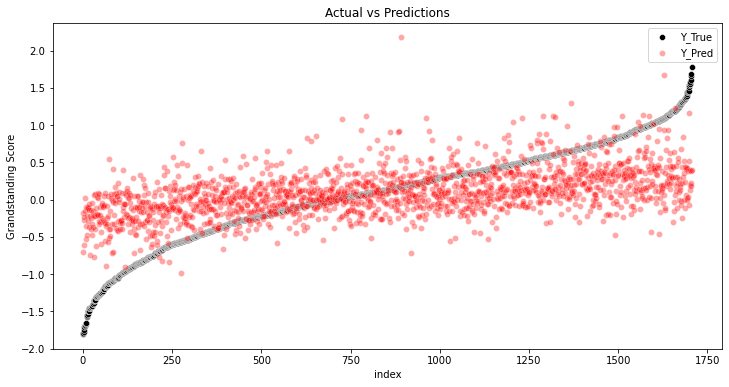

In [20]:
preds = grid.predict(X_test)
pred_df = pd.DataFrame(data={"y_true":y_test, "y_pred": preds})

pred_df = pred_df.sort_values('y_true').reset_index(drop = True)
pred_df = pred_df.reset_index(drop = False)

figure, ax = plt.subplots(ncols = 1, figsize = (12,6))
g = sns.scatterplot(x = 'index', y = 'y_true', data = pred_df, alpha = 1, label = 'Y_True', color = 'k')
g = sns.scatterplot(x = 'index', y = 'y_pred', data = pred_df, alpha = .35, label = 'Y_Pred', color = 'red')
plt.title('Actual vs Predictions')
plt.ylabel('Grandstanding Score')
plt.show()

In [21]:
from scipy.stats import linregress
slope, intercept, r, p, se = linregress(pred_df["y_true"], pred_df["y_pred"])
print(f"R-squared: {r**2:.6f}")

R-squared: 0.248398


In [24]:
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds))

0.24821502241768556
0.31372256475513927
